# Exercise 04: Histogram

Подключаемся к базе данных

In [9]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt



connection = sqlite3.connect("../data/checking-logs.sqlite")

Выполняем запрос, который получает дату из таблицы `checker`, выбирая только пользователей, а не администраторов.

In [10]:
commits = pd.read_sql("""
SELECT timestamp
FROM checker
WHERE uid LIKE 'user_%'
""", connection)

Работаем с датафреём и выделяем необходимые данные

In [16]:
commits['date'] = pd.to_datetime(commits['timestamp'])
commits['hour'] = commits['date'].dt.hour
commits['weekday'] = commits['date'].dt.weekday 


working_hours = commits[commits['weekday'] < 5]['hour'].tolist()
weekend_hours = commits[commits['weekday'] >= 5]['hour'].tolist()


len(working_hours), len(weekend_hours)

(2037, 1170)

Создаём график

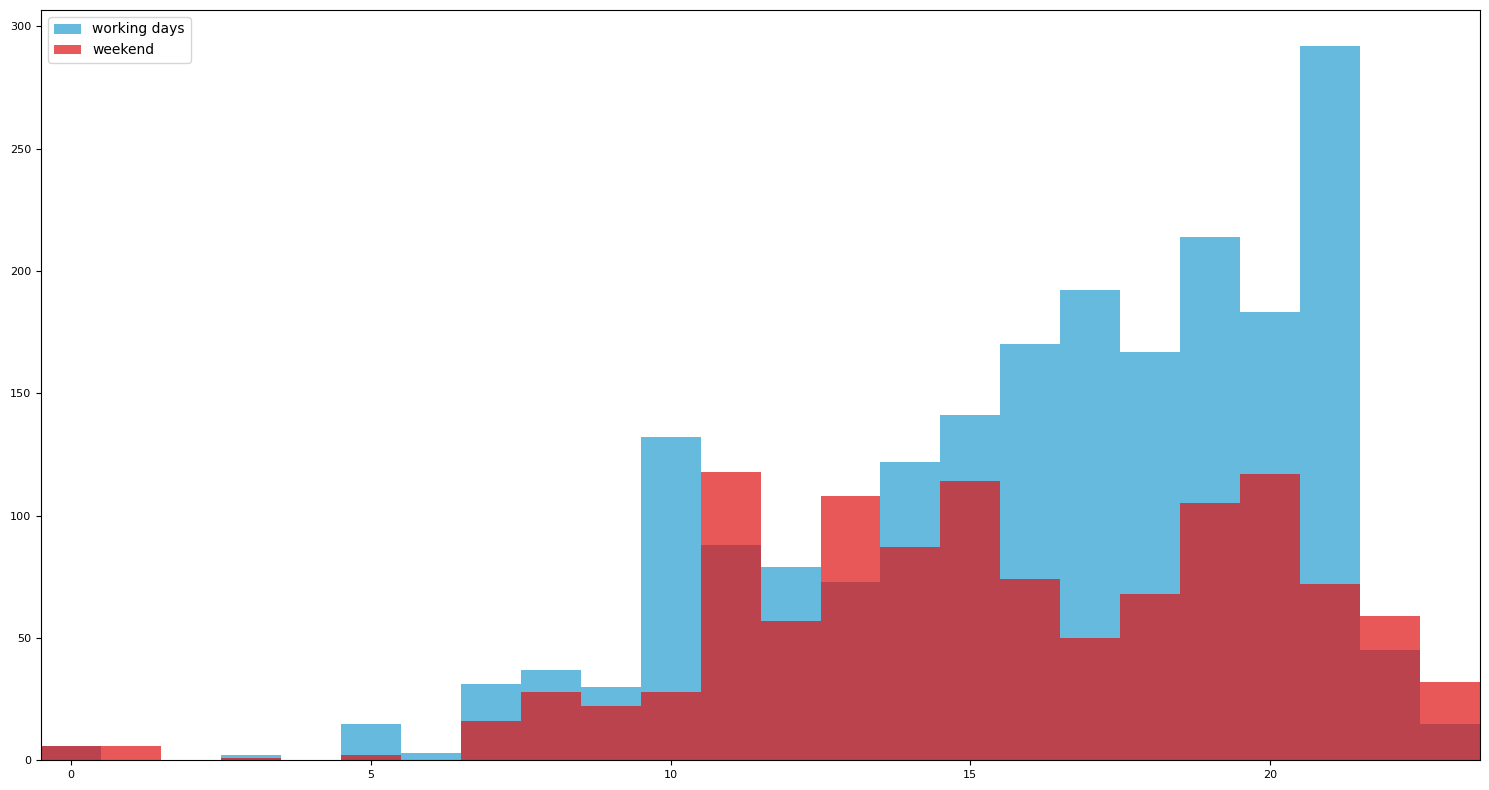

In [12]:
plt.figure(figsize=(15, 8))

plt.hist(working_hours, bins=24, range=(0, 24), alpha=0.7, 
         color="#249DD0", label='working days', align='left', rwidth=1.0)


plt.hist(weekend_hours, bins=24, range=(0, 24), alpha=0.7, 
         color="#E11111", label='weekend', align='left', rwidth=1.0)

plt.xticks(range(0,24,5), fontsize=8)
plt.xlim(-0.5, 23.5)
plt.yticks(fontsize=8)
plt.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

Закрываем соединение с базой данных

In [13]:
connection.close()

Были ли случаи, когда общее количество коммитов в выходные дни превышало количество коммитов в рабочие дни? 
В своем ответе приведите четыре наиболее ярких примера.

Ответ: да были, пример `11, 13, 22, 23`